# 데이터 확인 및 datetime

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sampleSubmission.csv')

train.info()
test.info()
sampleSubmission.info()

train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
train['datetime']= pd.to_datetime(train['datetime'])
test['datetime']= pd.to_datetime(test['datetime'])

train['year'] =train['datetime'].dt.year
train['month'] =train['datetime'].dt.month
train['day'] =train['datetime'].dt.day
train['hour'] =train['datetime'].dt.hour
train['dayofweek'] =train['datetime'].dt.dayofweek

test['year'] =test['datetime'].dt.year
test['month'] =test['datetime'].dt.month
test['day'] =test['datetime'].dt.day
test['hour'] =test['datetime'].dt.hour
test['dayofweek'] =test['datetime'].dt.dayofweek

In [55]:
print(train.isnull().sum())
print(test.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dayofweek     0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
dayofweek     0
dtype: int64


# 범주형
- barplot
- 시간별로 pointplot
- drop
- 원핫 인코딩

In [56]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

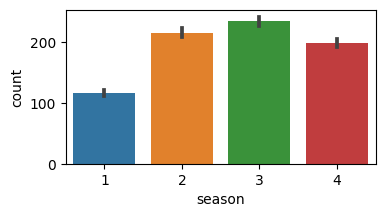

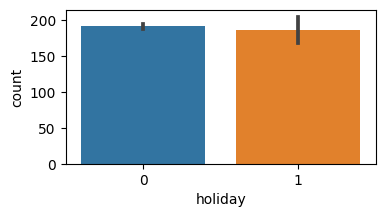

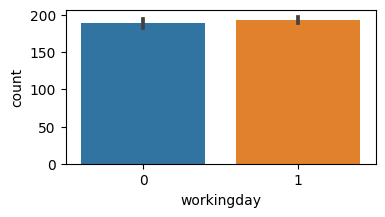

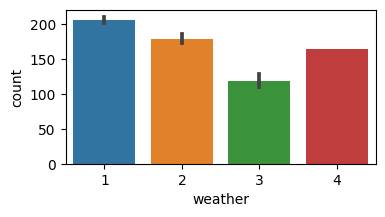

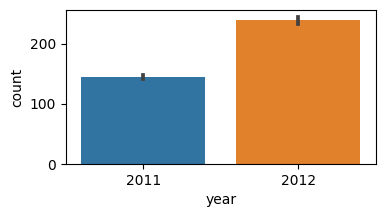

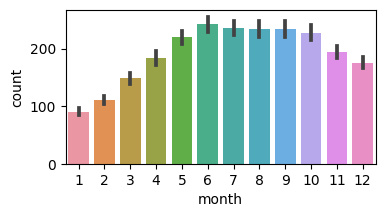

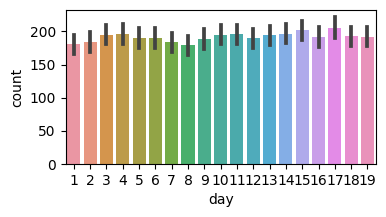

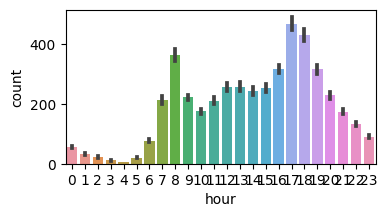

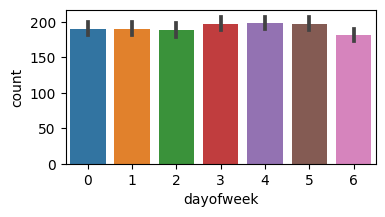

In [57]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather','year', 'month', 'day', 'hour', 'dayofweek']

for i in categorical_columns:
    plt.figure(figsize= (4,2))
    sns.barplot(data = train, x=i, y='count')
    plt.show()

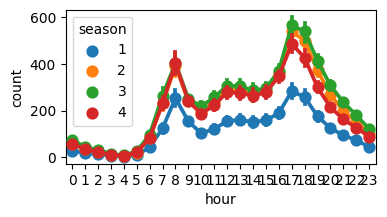

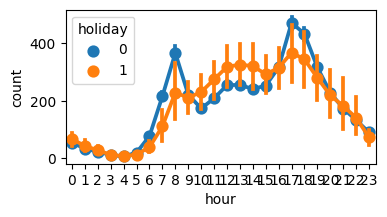

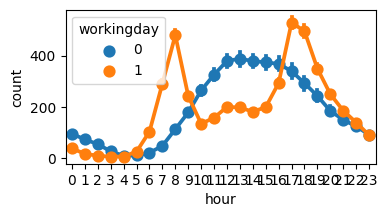

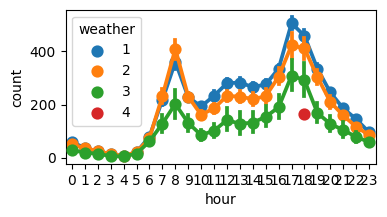

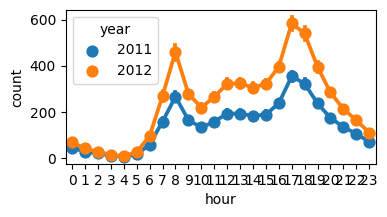

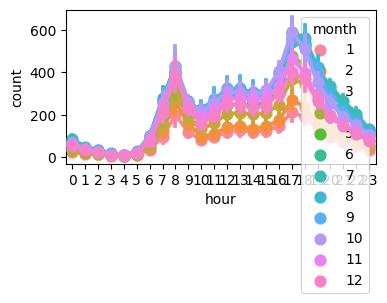

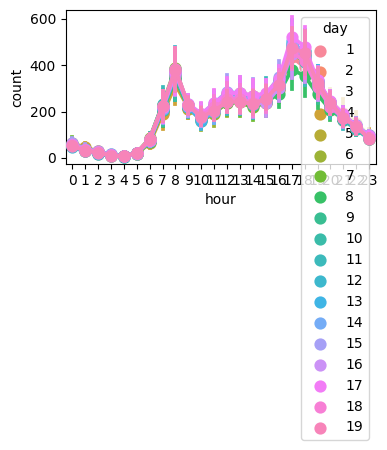

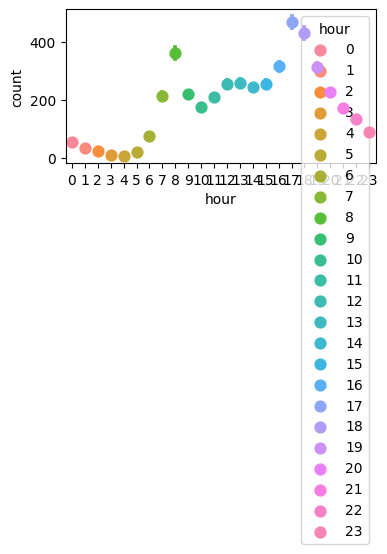

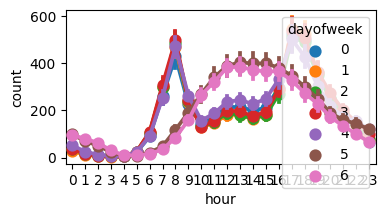

In [58]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather','year', 'month', 'day', 'hour', 'dayofweek']

for i in categorical_columns:
    plt.figure(figsize= (4,2))
    sns.pointplot(data = train, x='hour', y='count',hue = i)
    plt.show()

In [60]:
train.drop(['datetime','workingday','casual', 'registered'],axis =1,inplace =True)
test.drop(['datetime','workingday'],axis =1,inplace =True)

In [65]:
train.columns

one_hot_encoding_columns = ['season','weather']

train = pd.get_dummies(train,columns = one_hot_encoding_columns)
test = pd.get_dummies(test,columns = one_hot_encoding_columns)

In [66]:
train.columns

Index(['holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'year',
       'month', 'day', 'hour', 'dayofweek', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [67]:
test.columns

Index(['holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month',
       'day', 'hour', 'dayofweek', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

# 연속형
- heatmap
- scatter
- boxplot
- drop

<AxesSubplot:>

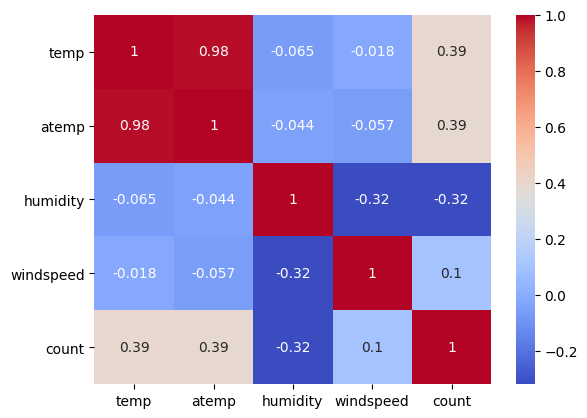

In [70]:
con_num = ['temp', 'atemp', 'humidity', 'windspeed']

sns.heatmap(train[con_num+['count']].corr(),annot=True, cmap= 'coolwarm')    

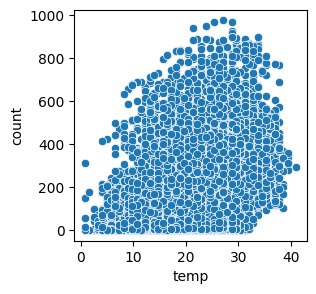

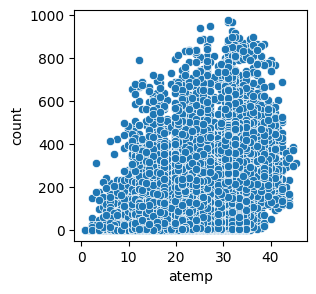

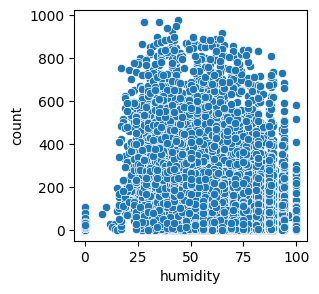

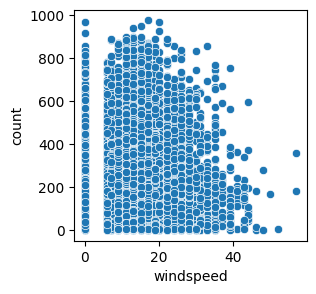

In [71]:
for i in con_num:
    plt.figure(figsize=(3,3))
    sns.scatterplot(data = train, x= i,y='count')
    plt.show()

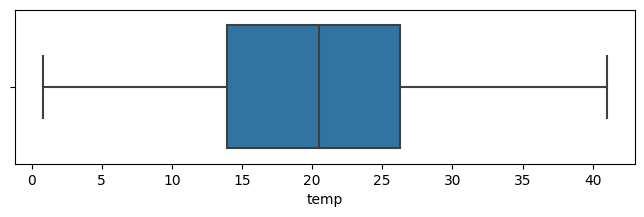

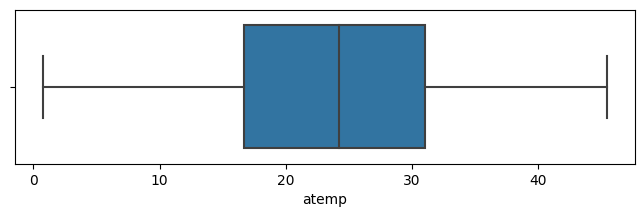

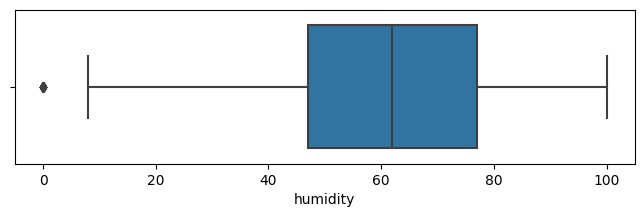

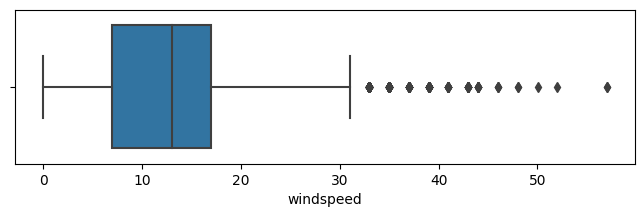

In [73]:
for i in con_num:
    plt.figure(figsize=(8,2))
    sns.boxplot(data = train, x= i)
    plt.show()

In [74]:
train.drop('atemp',axis=1,inplace =True)
test.drop('atemp',axis=1,inplace =True)
test.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

# 이상치

In [114]:
con_num.remove('atemp')

In [122]:
from collections import Counter

def ddd(data, n,cols):
    outlier_indices  = []
    for col in cols:
        q1 = np.percentile(data[col],25)
        q3 = np.percentile(data[col],75)
        iqr = q3-q1
        outlier_step = 1.5 *iqr
        outlier_list_col = data[(data[col] <q1- outlier_step) |
                                (data[col] >q3+ outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices =Counter(outlier_indices)
    return list(k for k,v in outlier_indices.items() if v>n)

ol = ddd(train,2,con_num)
train = train.drop(ol,axis =0).reset_index(drop=True)
train

,holiday,temp,humidity,windspeed,count,year,month,day,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,9.84,81,12.799395,16,2011,1,1,0,5,1,0,0,0,1,0,0,0
1,0,9.02,80,12.799395,40,2011,1,1,1,5,1,0,0,0,1,0,0,0
2,0,9.02,80,12.799395,32,2011,1,1,2,5,1,0,0,0,1,0,0,0
3,0,9.84,75,12.799395,13,2011,1,1,3,5,1,0,0,0,1,0,0,0
4,0,9.84,75,12.799395,1,2011,1,1,4,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0,15.58,50,26.002700,336,2012,12,19,19,2,0,0,0,1,1,0,0,0
10881,0,14.76,57,15.001300,241,2012,12,19,20,2,0,0,0,1,1,0,0,0
10882,0,13.94,61,15.001300,168,2012,12,19,21,2,0,0,0,1,1,0,0,0
10883,0,13.94,61,6.003200,129,2012,12,19,22,2,0,0,0,1,1,0,0,0


# 결측치

In [96]:
train.loc[train['windspeed']==0,'windspeed'] = train['windspeed'].mean()
test.loc[test['windspeed']==0,'windspeed'] = test['windspeed'].mean()

# 왜도,첨도

C:\Users\Songwooseok\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.2420662117180776
1.3000929518398334


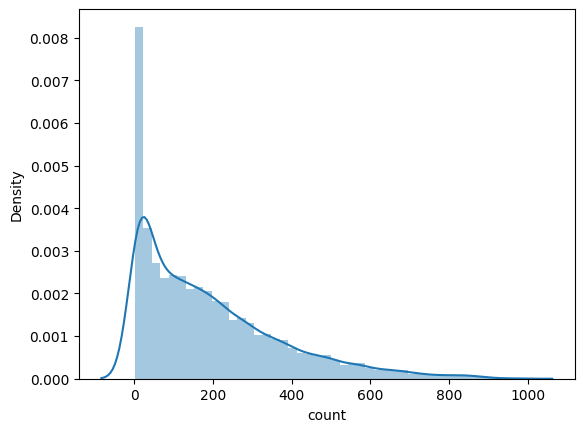

In [97]:
sns.distplot(train['count'])

print(train['count'].skew())
print(train['count'].kurt())

# 모델링 

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_log_error

x = train.drop('count',axis =1)
y= train['count']

x_train, x_val,y_train, y_val= train_test_split(x,y,test_size=0.2)

MinMaxScaler = MinMaxScaler()
x_train = MinMaxScaler.fit_transform(x_train)
y_train = np.log(y_train)

model1 = GradientBoostingRegressor(n_estimators=500)
model2 = xgb.XGBRegressor(n_estimators =500)



In [113]:
model = model2
model.fit(x_train,y_train)

x_val = MinMaxScaler.fit_transform(x_val)
y_pred_val = model.predict(x_val)
y_pred_val = np.exp(y_pred_val)

print("error:",np.sqrt(mean_squared_log_error(y_val,y_pred_val)))

test_reg = MinMaxScaler.fit_transform(test)
y_pred_test =model.predict(test_reg)
y_pred_test = np.exp(y_pred_test)

sampleSubmission = pd.read_csv("sampleSubmission.csv")
sampleSubmission['count'] =y_pred_test

sampleSubmission.to_csv('xgb.csv',index = False)

error: 0.30956888807205213


In [106]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

x = train.drop(['holiday','count'],axis=1)
y= train['holiday']

x_train, x_val,y_train, y_val= train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=500)

model.fit(x_train,y_train)

y_val_pred = model.predict(x_val)
print(classification_report(y_val, y_val_pred))


test_cl = test.drop('holiday',axis= 1)

y_pred_test = model.predict(test_cl)
sampleSubmission['count'] = y_pred_test
sampleSubmission.columns = ["이건","갯수"]
sampleSubmission.to_csv("분류",index =False)
sampleSubmission

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2111
           1       1.00      0.96      0.98        67

    accuracy                           1.00      2178
   macro avg       1.00      0.98      0.99      2178
weighted avg       1.00      1.00      1.00      2178



ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [107]:
sampleSubmission

,이건,갯수,count
0,2011-01-20 00:00:00,0,0
1,2011-01-20 01:00:00,0,0
2,2011-01-20 02:00:00,0,0
3,2011-01-20 03:00:00,0,0
4,2011-01-20 04:00:00,0,0
...,...,...,...
6488,2012-12-31 19:00:00,0,0
6489,2012-12-31 20:00:00,0,0
6490,2012-12-31 21:00:00,0,0
6491,2012-12-31 22:00:00,0,0
